In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import numpy as np

In [2]:
df = pd.read_csv('D:/Data/LocustTest/200_locust_11142022_0002.tsv', sep='\t', skiprows=11, index_col='Time')

In [74]:
df.head(10)

,Frame,X,Y,Z,X.1,Y.1,Z.1,X.2,Y.2,Z.2,...,X.1297,Y.1297,Z.1297,X.1298,Y.1298,Z.1298,X.1299,Y.1299,Z.1299,Unnamed: 3902
Time,,,,,,,,,,,,,,,,,,,,,
0.00,1,1537.634,2943.620,371.787,574.688,10.452,50.055,200.860,2469.208,358.624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.01,2,1537.635,2943.619,371.791,574.685,10.449,50.040,200.857,2469.210,358.608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.02,3,1537.634,2943.615,371.800,574.678,10.445,50.031,200.856,2469.212,358.605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.03,4,1537.637,2943.622,371.795,574.683,10.445,50.013,200.860,2469.209,358.610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.04,5,1537.691,2943.882,370.912,574.651,10.268,49.610,200.787,2469.282,358.030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.05,6,1537.698,2943.900,370.847,574.685,10.241,49.528,200.765,2469.294,357.973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.06,7,1537.690,2943.911,370.825,574.706,10.227,49.504,200.759,2469.301,357.933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.07,8,1537.688,2943.911,370.813,574.701,10.224,49.475,200.756,2469.309,357.899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.08,9,1537.696,2943.909,370.782,574.712,10.209,49.444,200.753,2469.308,357.906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Frame', ' X', ' Y', ' Z', ' X.1', ' Y.1', ' Z.1', ' X.2', ' Y.2',
       ' Z.2',
       ...
       ' X.1297', ' Y.1297', ' Z.1297', ' X.1298', ' Y.1298', ' Z.1298',
       ' X.1299', ' Y.1299', ' Z.1299', 'Unnamed: 3902'],
      dtype='object', length=3902)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 96972 entries, 0.0 to 969.71
Columns: 3902 entries, Frame to Unnamed: 3902
dtypes: float64(3901), int64(1)
memory usage: 2.8 GB
None


In [6]:
X_subset = [f' X.{_}' for _ in range(1,1300)]
Y_subset = [f' Y.{_}' for _ in range(1,1300)]
Z_subset = [f' Z.{_}' for _ in range(1,1300)]

In [7]:
print(df[X_subset].abs().min().min())
print(df[X_subset].abs().max().max())
print(df[Y_subset].abs().min().min())
print(df[Y_subset].abs().max().max())
print(df[Z_subset].abs().min().min())
print(df[Z_subset].abs().max().max())

7.606
3598.759
9.982
3130.672
0.404
2654.965


In [8]:
xmin = 0
xmax = 2200
ymin = 1000
ymax = 3200

In [101]:
# We notice that a lot of the entries are NaN. We would like to get rid of the columns where > 90% of the data is NaN. 
# We will create a new dataframe ndf to do this.
ndf = df.copy()

cols_to_delete = ndf.columns[ndf.isnull().sum()/len(df) > .90]
ndf.drop(cols_to_delete, axis = 1, inplace = True)


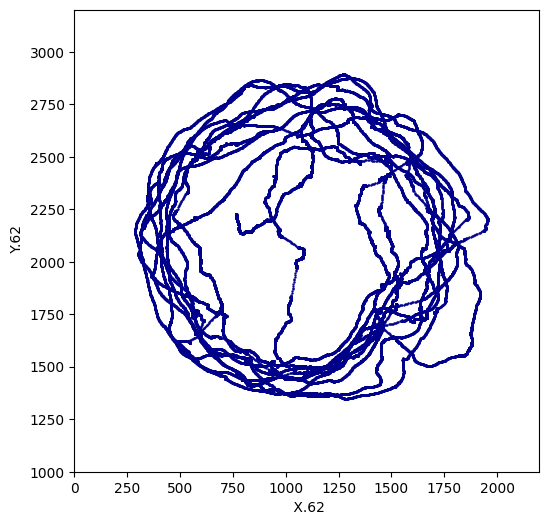

In [102]:
LocustNumber = int(random.choice(ndf.columns[1:])[3:])

fig = plt.figure(figsize=(6,6))

ax = plt.subplot(111)
ndf[[f' X.{LocustNumber}', f' Y.{LocustNumber}', f' Z.{LocustNumber}']].plot.scatter(x=f' X.{LocustNumber}', y=f' Y.{LocustNumber}', c='DarkBlue', s=0.5, ax=ax )
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)



plt.show()

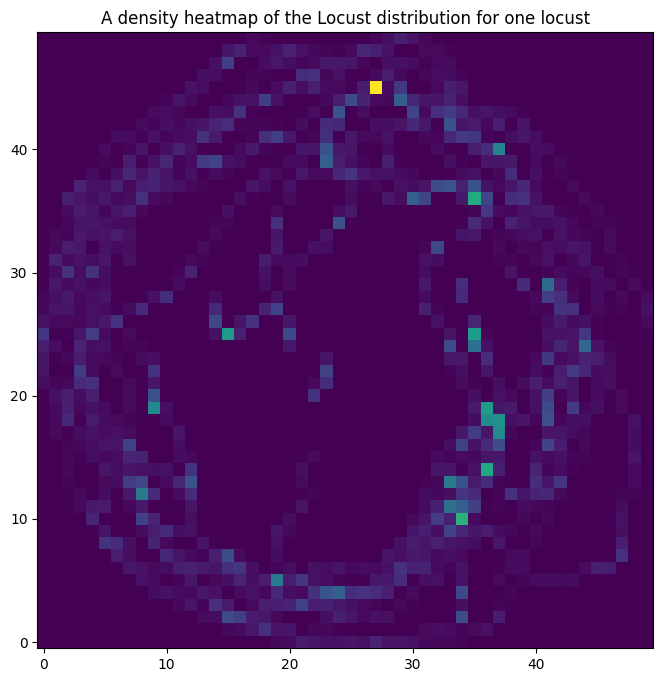

In [111]:
heatmap, xedges, yedges = np.histogram2d(ndf[f' X.{LocustNumber}'], ndf[f' Y.{LocustNumber}'], bins=50)
plt.figure(figsize=(8,8))

plt.title('A density heatmap of the Locust distribution for one locust')
plt.imshow(heatmap.T, origin='lower')
plt.savefig('Heatmap.png')
plt.show()

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 96972 entries, 0.0 to 969.71
Columns: 3902 entries, Frame to Unnamed: 3902
dtypes: float64(3901), int64(1)
memory usage: 2.8 GB


In [104]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 96972 entries, 0.0 to 969.71
Columns: 799 entries, Frame to  Z.1160
dtypes: float64(798), int64(1)
memory usage: 591.9 MB
